# Pregunta 6

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Matriz de confusión:
[[178   3]
 [ 16  95]]


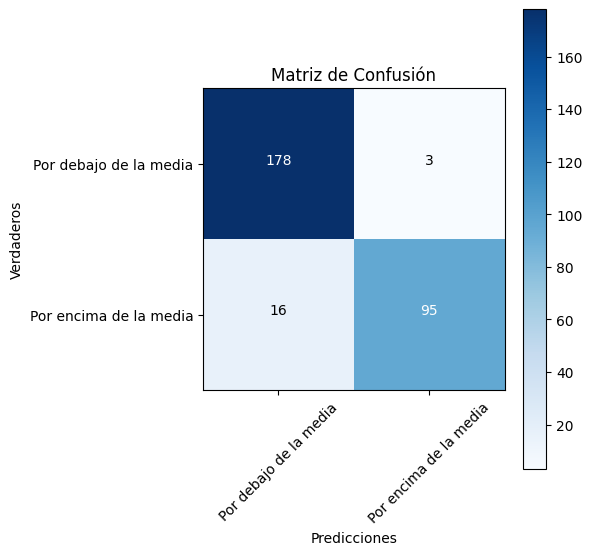

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       181
           1       0.97      0.86      0.91       111

    accuracy                           0.93       292
   macro avg       0.94      0.92      0.93       292
weighted avg       0.94      0.93      0.93       292



In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv('train.csv')

# Filtrar solo las columnas numéricas para las variables predictoras
df_numeric = df.select_dtypes(include=[np.number])

# Separar la variable de respuesta 'SalePrice' y las variables predictoras
y_reg = df['SalePrice']
X_reg = df_numeric.drop(columns=['SalePrice'])

# Manejo de valores nulos: reemplazar valores nulos con la media
X_reg = X_reg.fillna(X_reg.mean())

# Dividir el dataset en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Dividir los precios en categorías para poder hacer clasificación (por encima o por debajo de la media)
y_train_class = (y_train > y_train.mean()).astype(int)
y_test_class = (y_test > y_test.mean()).astype(int)

# Crear un modelo de regresión logística para clasificación
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train_class)

# Predecir con el modelo
y_pred_class = model.predict(X_test)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión
plt.figure(figsize=(6,6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
classes = ['Por debajo de la media', 'Por encima de la media']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Etiquetas de los ejes
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')

# Añadir los valores en la matriz
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

# Imprimir un reporte detallado de la clasificación
print("Reporte de clasificación:")
print(classification_report(y_test_class, y_pred_class))


# Pregunta 7


### Entrenamiento

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Cargar los datos (asegúrate de tener el DataFrame `df` listo)
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el preprocesamiento para las variables categóricas y manejo de valores faltantes
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputación con la moda
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Codificación OneHot
        ]), X.select_dtypes(include=['object']).columns),
        ('num', SimpleImputer(strategy='mean'), X.select_dtypes(include=['number']).columns)  # Imputación para columnas numéricas
    ]
)

# Crear el modelo con un pipeline de preprocesamiento
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir en los conjuntos de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE) para ambos conjuntos
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'MSE en entrenamiento: {mse_train}')
print(f'MSE en prueba: {mse_test}')

# Análisis del sobreajuste o desajuste
if mse_train < mse_test:
    print("El modelo puede estar sobreajustado (overfitting).")
elif mse_train > mse_test:
    print("El modelo puede estar desajustado (underfitting).")
else:
    print("El modelo parece estar bien ajustado.")


MSE en entrenamiento: 594240888.79965
MSE en prueba: 981414258.468189
El modelo puede estar sobreajustado (overfitting).


In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Cargar los datos (reemplazar con tu DataFrame)
df = pd.read_csv('train.csv')

# Selección de las características y la variable objetivo
X = df.drop('SalePrice', axis=1)  # Suponiendo que 'SalePrice' es la variable objetivo
y = df['SalePrice']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identificación de columnas numéricas y categóricas
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocesador para columnas numéricas y categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Corrección aquí
        ]), categorical_cols)
    ]
)

# Crear el modelo con regularización Ridge (puedes probar también Lasso)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))  # Ajuste del parámetro alpha para regularización
])

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predicciones
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluación del modelo
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'MSE en entrenamiento: {mse_train}')
print(f'MSE en prueba: {mse_test}')


MSE en entrenamiento: 450383859.5388203
MSE en prueba: 890606216.4007324
